<a href="https://colab.research.google.com/github/fridymandita/TKB/blob/main/Forecasting_the_Rossman_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="probdes"></a>
    
# Problem Description
- - - - -- -- - - - -   - - - - 
We will use the rossman store sales database for this notebook. Following is the description of Data from the website:

"Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied."

In [2]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
import fbprophet

# matplotlib parameters
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [3]:
# Data Reading
train = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
store = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv', low_memory = False)

##Train Data

In [4]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
train.shape

(1017209, 8)

In [7]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head()

Date
2015-07-31     9.482883
2015-07-31     9.702400
2015-07-31    10.126675
2015-07-31     9.342457
2015-07-31     8.626118
Name: SalesPerCustomer, dtype: float64

In [10]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

SalesPerCustomer    172869
Store                    0
DayOfWeek                0
Sales                    0
Customers                0
Open                     0
Promo                    0
StateHoliday             0
SchoolHoliday            0
dtype: int64

In [11]:
train.dropna().head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,8.626118


## Store Data

In [12]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store.shape

(1115, 10)

In [14]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace = True)

In [16]:
store.fillna(0, inplace = True)

In [17]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [18]:
train = train.merge(right=store, on='Store', how='left')

## Naive Model

In [19]:
train = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv", parse_dates = True, low_memory = False, index_col = 'Date')
train = train.sort_index(ascending = True)

In [20]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head

<bound method NDFrame.head of Date
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
                ...    
2015-07-31    14.235110
2015-07-31    12.963680
2015-07-31    12.942907
2015-07-31    10.295276
2015-07-31     9.482883
Name: SalesPerCustomer, Length: 1017209, dtype: float64>

In [21]:
train = train.dropna()

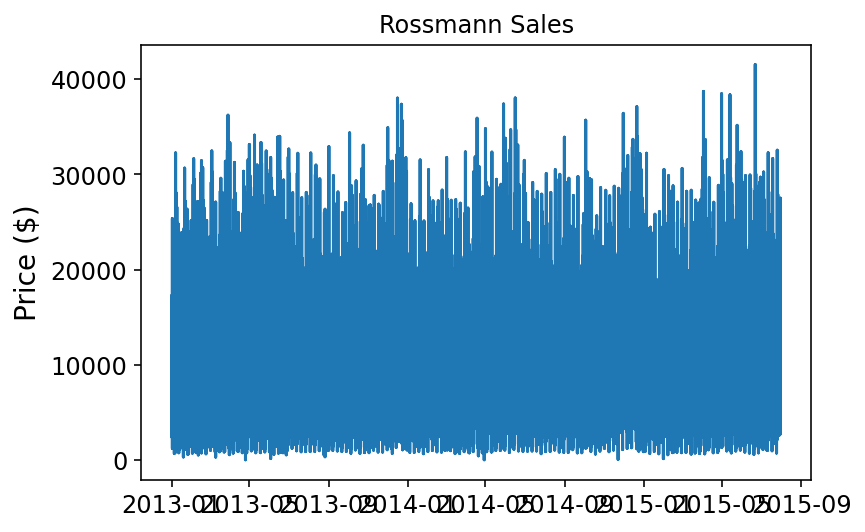

In [22]:
plt.plot(train.index, train['Sales'])
plt.title('Rossmann Sales')
plt.ylabel('Price ($)');
plt.show()

In [23]:
train['Year'] = train.index.year

# Take Dates from index and move to Date column 
train.reset_index(level=0, inplace = True)
train['sales'] = 0


In [24]:
train_store=train[0:675472] 
test_store=train[675472:]

In [25]:
train_store.Date = pd.to_datetime(train_store.Date, format="%Y-%m-%d")
train_store.index = train_store.Date
test_store.Date = pd.to_datetime(test_store.Date, format="%Y-%m-%d")
test_store.index = test_store.Date

train_store = train_store.resample('D').mean()
train_store = train_store.interpolate(method='linear')

test_store = test_store.resample('D').mean()
test_store = test_store.interpolate(method='linear')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


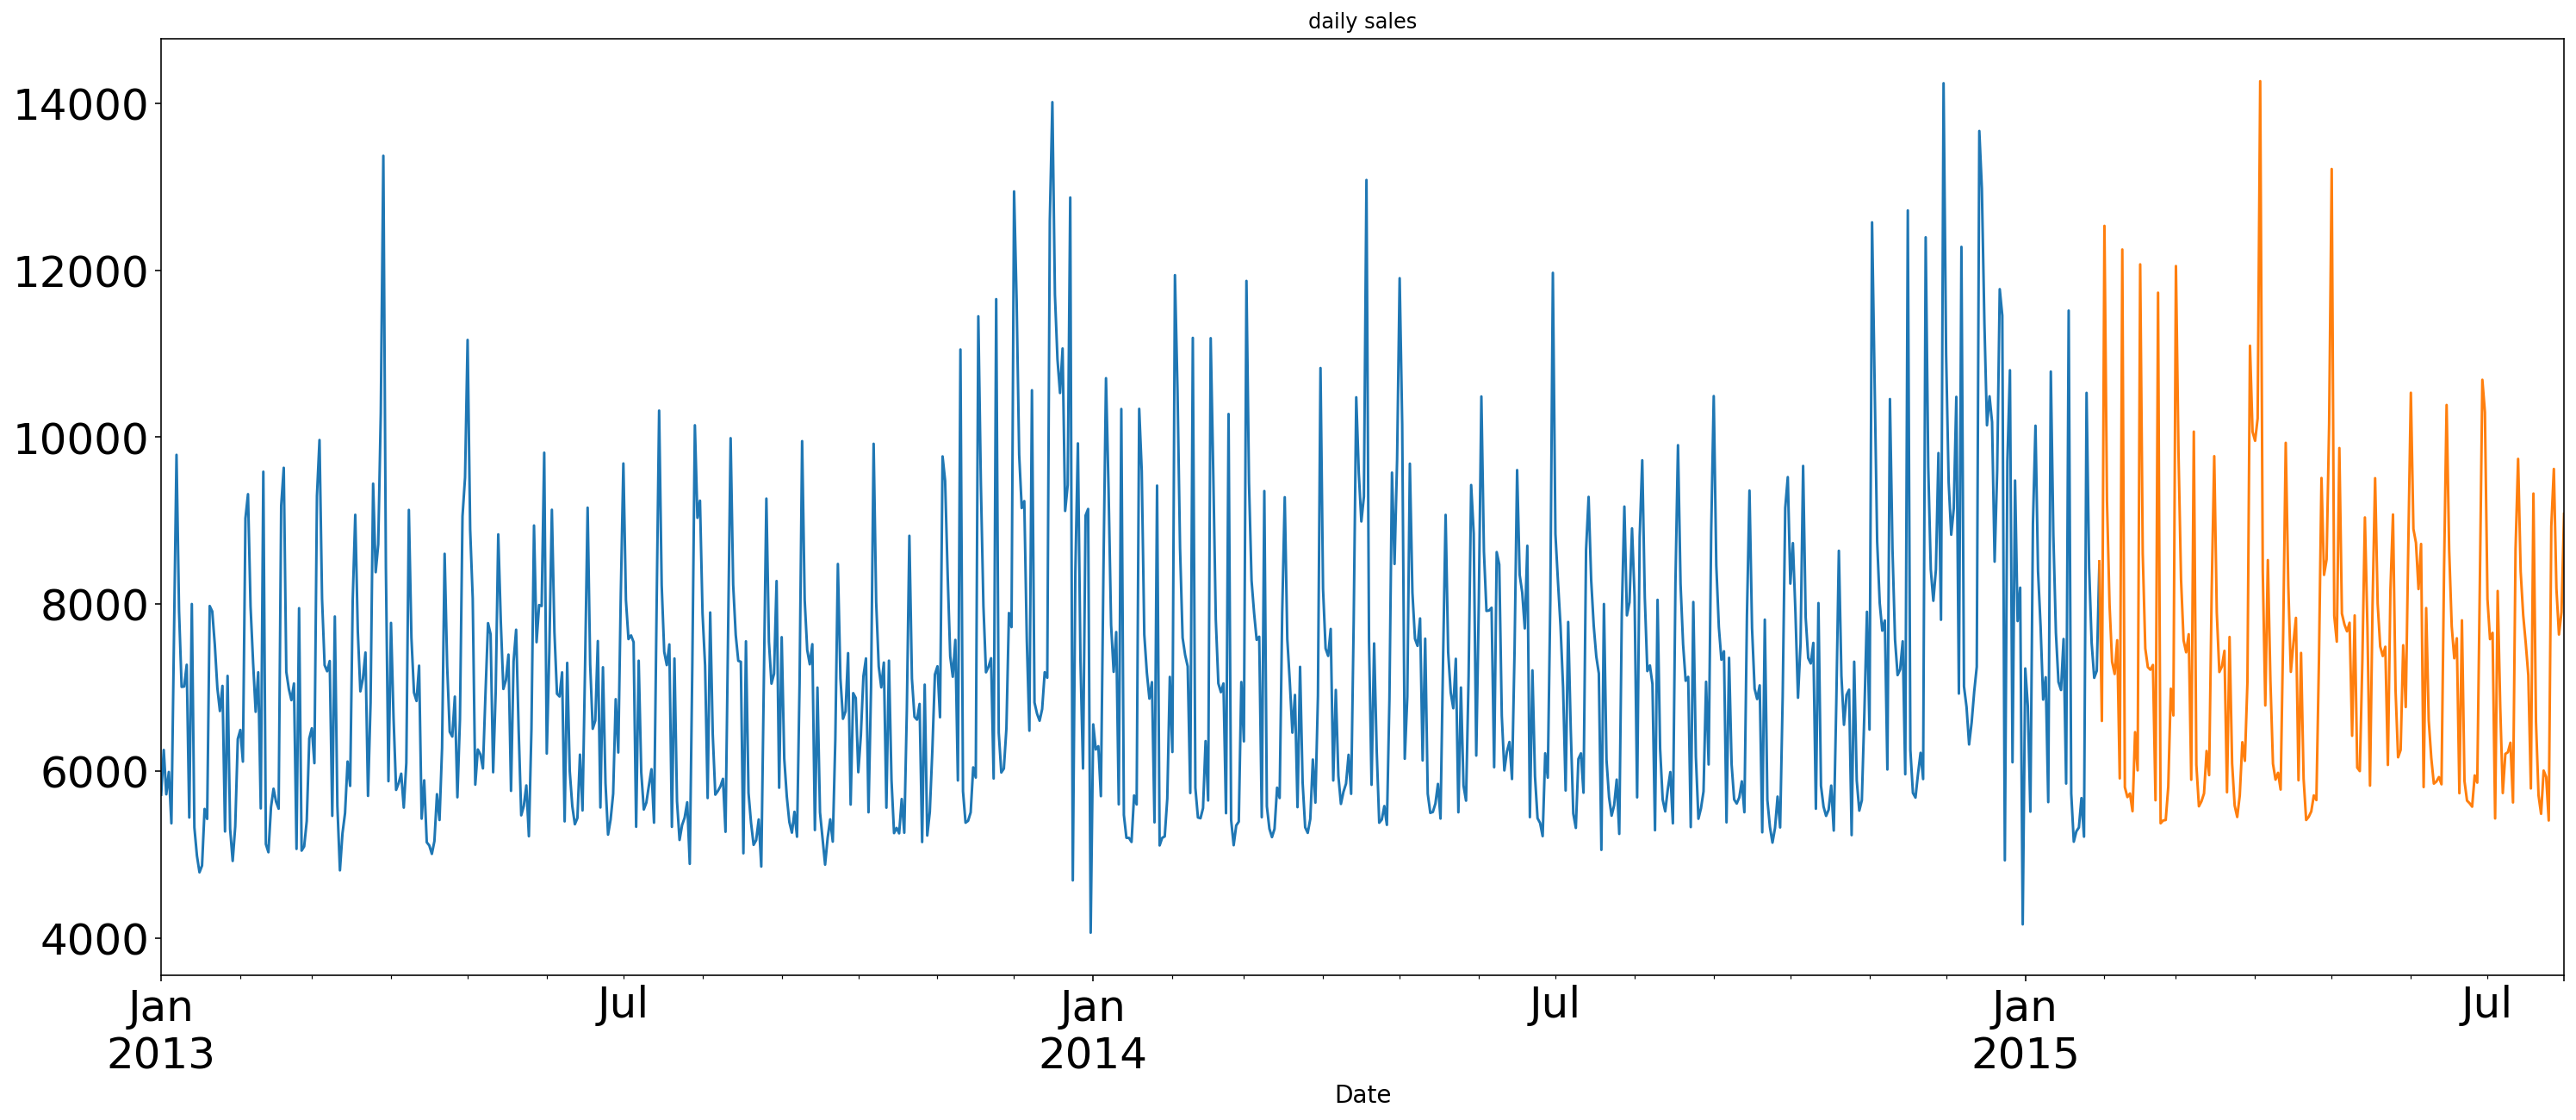

In [26]:
train_store.Sales.plot(figsize=(25,10), title='daily sales', fontsize=25)
test_store.Sales.plot()

Text(0.5, 1.0, 'Moving Average Forecast')

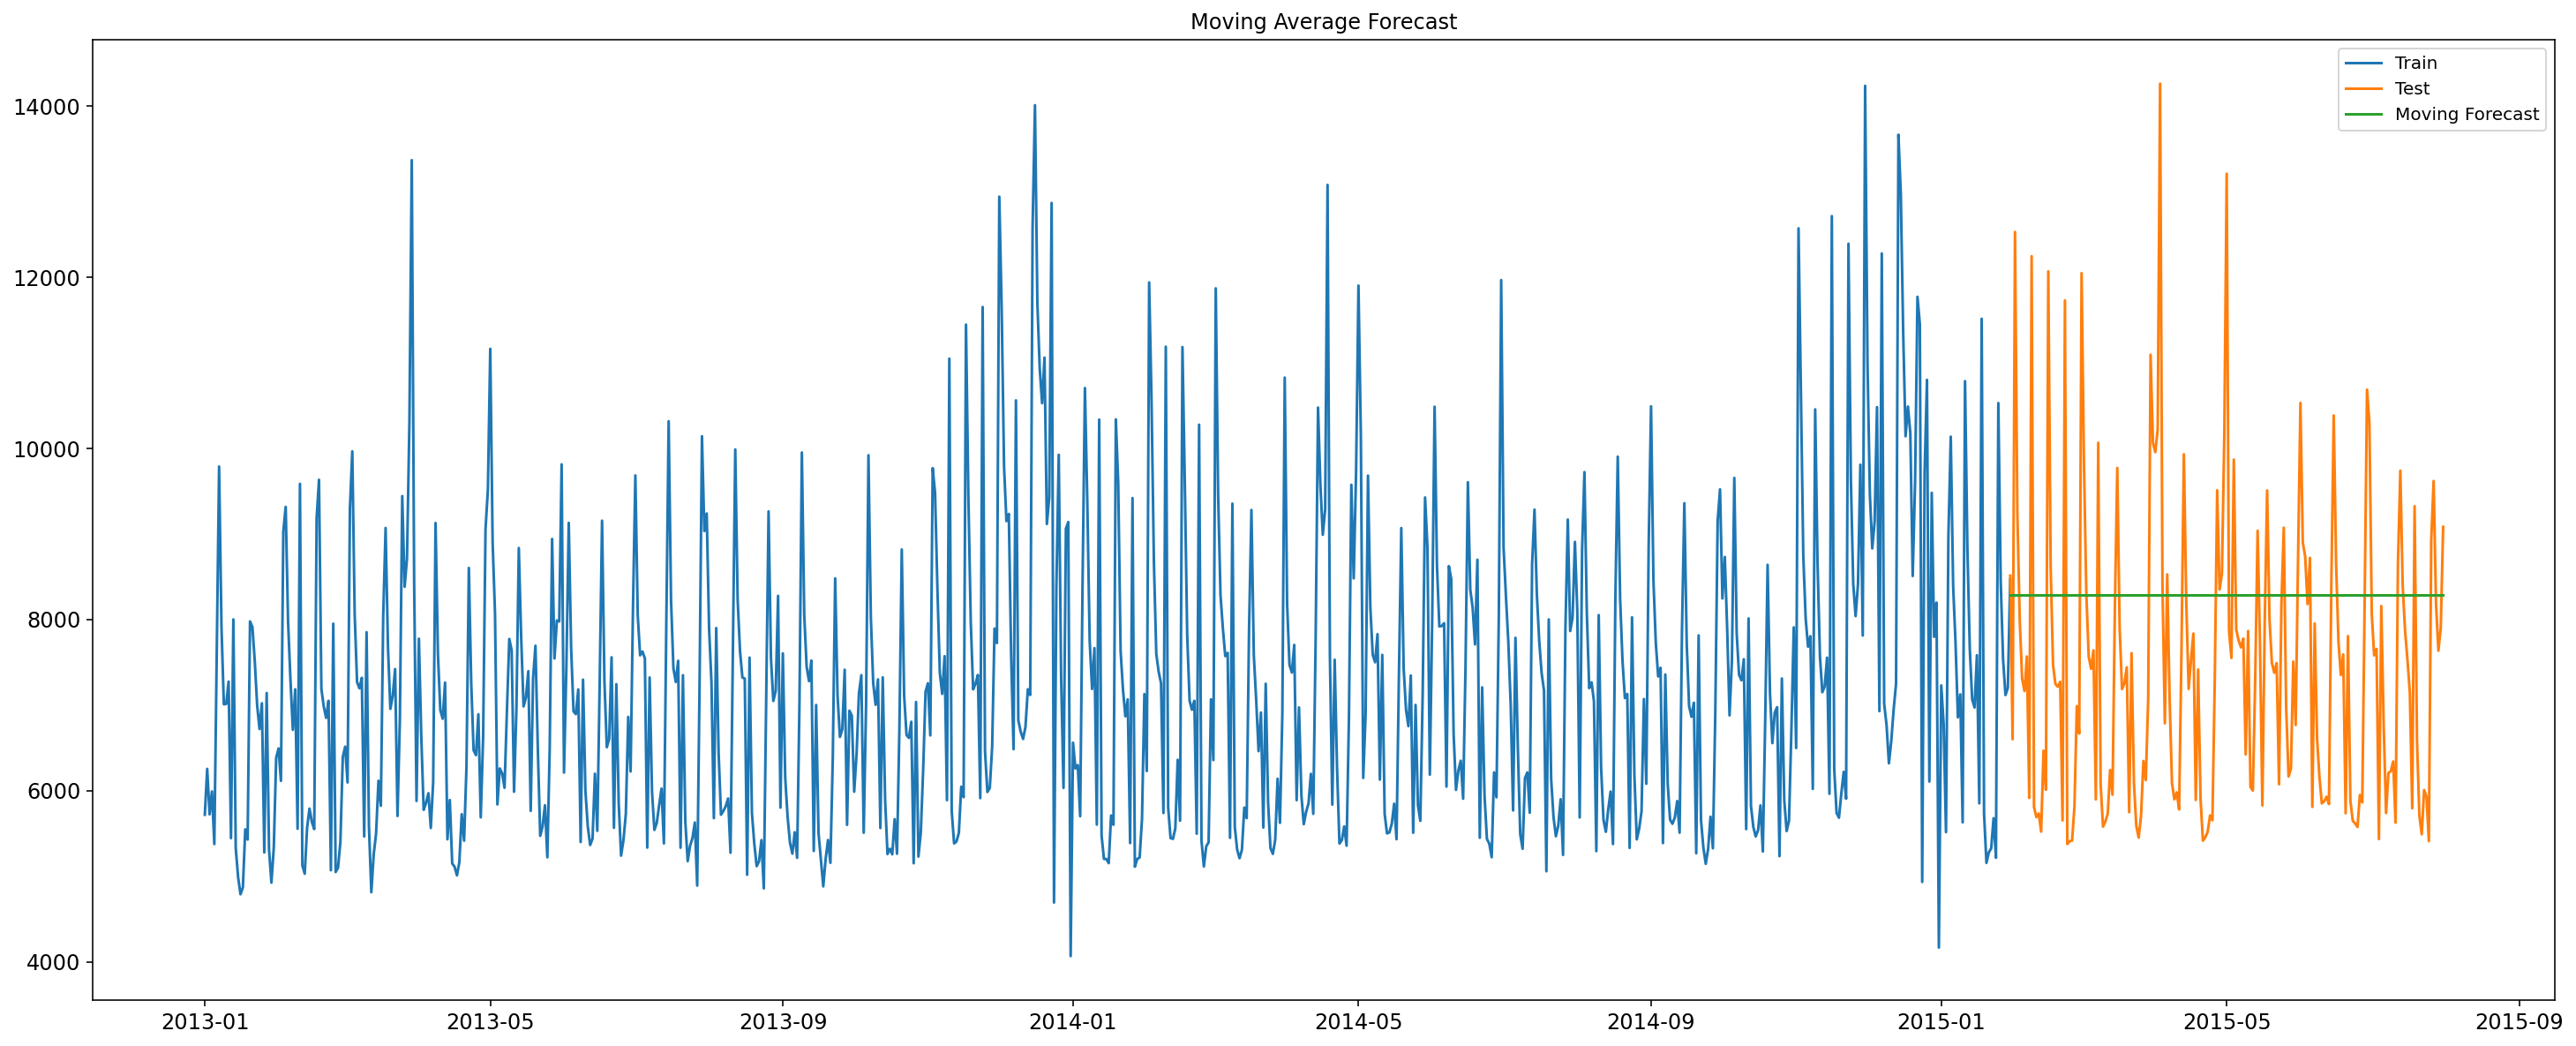

In [27]:
y_hat_avg_moving = test_store.copy()
y_hat_avg_moving['moving_avg_forcast'] = train_store.Sales.rolling(90).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train_store['Sales'], label='Train')
plt.plot(test_store['Sales'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [28]:
rms_avg_rolling = sqrt(mean_squared_error(test_store.Sales, y_hat_avg_moving.moving_avg_forcast))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 1915.886219620582


#Facebook Prophet Model


In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv", parse_dates = True, low_memory = False)

In [ ]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head()

train = train.dropna()

In [ ]:
sales = train[train.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [ ]:
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

In [ ]:
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


In [ ]:
sales_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, daily_seasonality=True)
sales_prophet.fit(sales)

In [ ]:
# Try 4 different changepoints
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(sales)
    
    future = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future)
    
    sales[changepoint] = future['yhat']

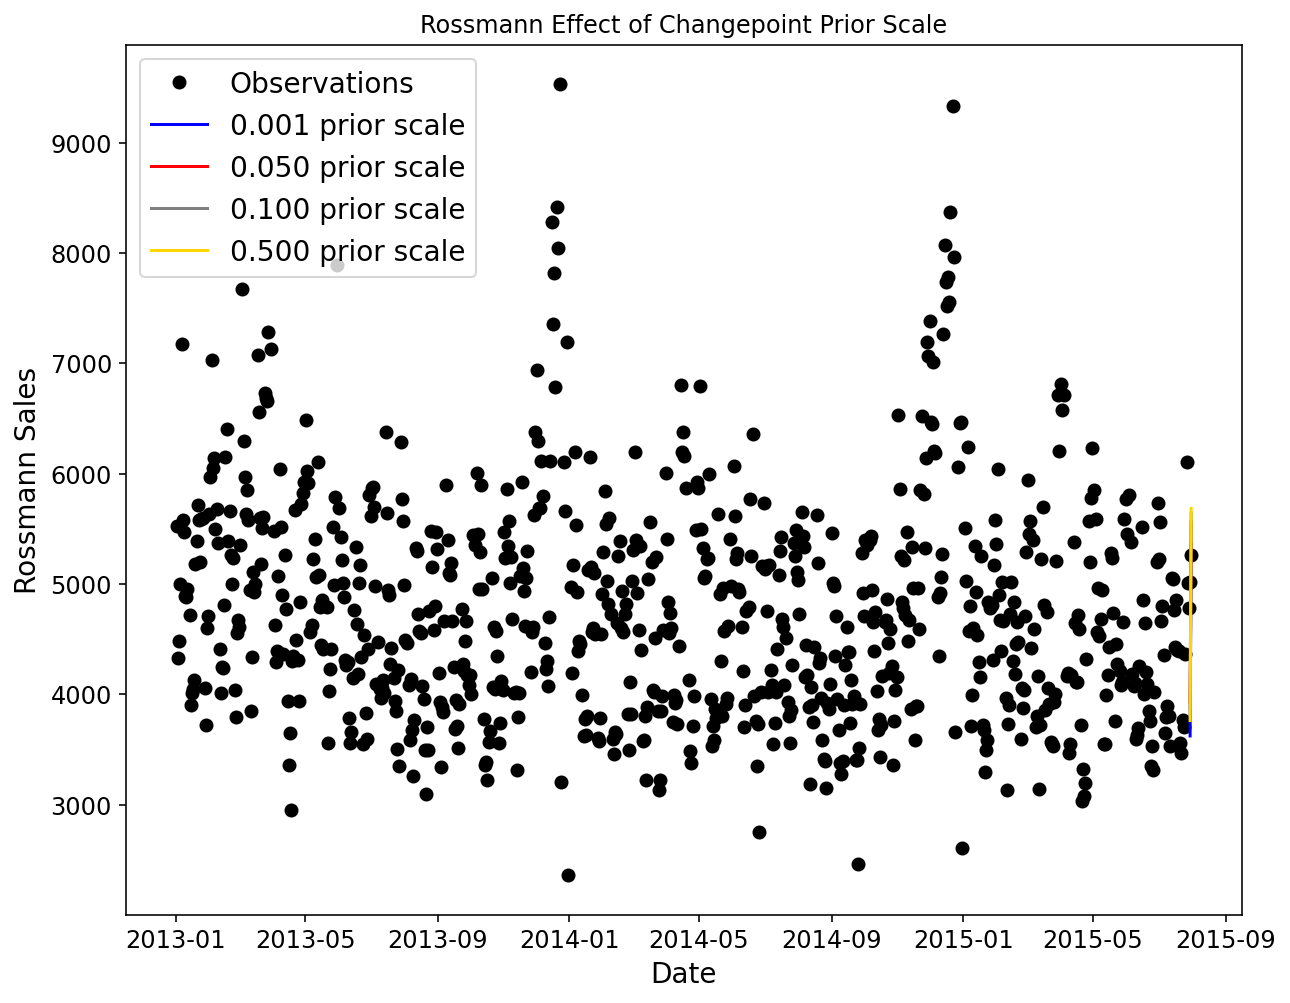

In [ ]:
#Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(sales['ds'], sales['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(sales['ds'], sales[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Rossmann Sales'); plt.title('Rossmann Effect of Changepoint Prior Scale');

##Predictions for 6 Weeks
In order to make forecasts, we need to create a future dataframe. We need to specify the amount of future periods to predict and the frequency of our prediction.

Periods: 6 Weeks 

Frequency: Daily

In [ ]:
# Make a future dataframe for 6weeks
sales_forecast = sales_prophet.make_future_dataframe(periods=6*7, freq='D')
# Make predictions
sales_forecast = sales_prophet.predict(sales_forecast)

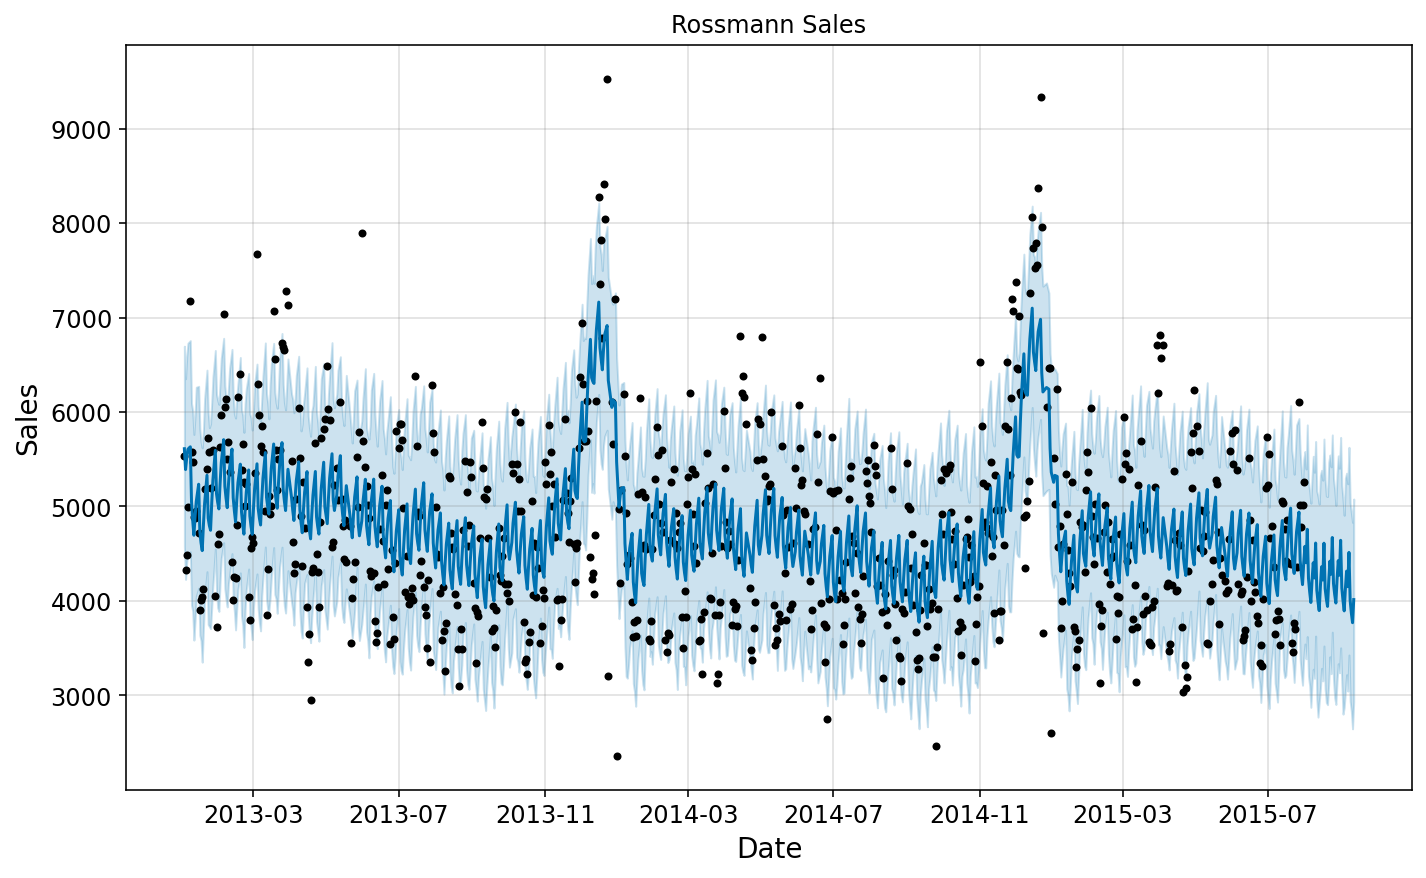

In [ ]:
sales_prophet.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Rossmann Sales');

In [ ]:
sales_prophet.changepoints[:10]

25    2013-01-31
50    2013-03-01
75    2013-04-02
100   2013-05-02
125   2013-06-04
150   2013-07-03
174   2013-07-31
199   2013-08-29
224   2013-09-27
249   2013-10-28
Name: ds, dtype: datetime64[ns]

In [ ]:
sales_prophet.changepoints[:15]

25    2013-01-31
50    2013-03-01
75    2013-04-02
100   2013-05-02
125   2013-06-04
150   2013-07-03
174   2013-07-31
199   2013-08-29
224   2013-09-27
249   2013-10-28
274   2013-11-26
299   2013-12-27
324   2014-01-27
349   2014-02-25
374   2014-03-26
Name: ds, dtype: datetime64[ns]